<a href="https://colab.research.google.com/github/ABCutter/DDDS-My-Projects/blob/main/Project_3/SQL_2_BQ_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SQL

## Pick a dataset that interests you (or multiple data sets)

Use the Open Data Sets available from Google BigQuery. You can use your own Google account or Kaggle.



## Come up with questions about your data
* What sort of information is in this dataset?
* How many records are there?
* Have the number of bitcoin transactions increased year over year?
* Does New Mexico get more or less rain now than 20 years ago?
* How many different countries (states, counties, cities, etc) have records in this data set?




## Use SQL queries to pull specific information

Do NOT pull all the data and then filter using DataFrame methods etc. Make sure and use AT LEAST 13 of the 15 SQL options listed below. (You may have to get creative and come up with more questions to ask/answer.)

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import seaborn as sns

## Data Collection/Sources


In [ ]:
##SETUP

# Step 1: Authenticate
from google.colab import auth
auth.authenticate_user()

# Step 2: Import packages
from google.cloud import bigquery

# Step 3: Set project ID
project_id = "abc-ddds-p3-cdc"
client = bigquery.Client(project=project_id)

from google.colab import userdata

billing_project_id=userdata.get('bq_billing_project_id')
billing_project_id

'abc-ddds-p3-cdc'

In [ ]:
%%capture
%%bash
apt-get update
apt-get install -y sqlite3

In [ ]:
!sqlite3 --help
#Check to make sure it's running

Usage: sqlite3 [OPTIONS] FILENAME [SQL]
FILENAME is the name of an SQLite database. A new database is created
if the file does not previously exist.
OPTIONS include:
   -A ARGS...           run ".archive ARGS" and exit
   -append              append the database to the end of the file
   -ascii               set output mode to 'ascii'
   -bail                stop after hitting an error
   -batch               force batch I/O
   -box                 set output mode to 'box'
   -column              set output mode to 'column'
   -cmd COMMAND         run "COMMAND" before reading stdin
   -csv                 set output mode to 'csv'
   -deserialize         open the database using sqlite3_deserialize()
   -echo                print commands before execution
   -init FILENAME       read/process named file
   -[no]header          turn headers on or off
   -help                show this message
   -html                set output mode to HTML
   -interactive         force interactive I/O
   -j

### Basic Queries


In [ ]:
!bq query --project_id=abc-ddds-p3-cdc --nouse_legacy_sql \
'SELECT COUNT(*) FROM `bigquery-public-data.usa_names.usa_1910_2013`'


+---------+
|   f0_   |
+---------+
| 5552452 |
+---------+


In [ ]:
query = """
SELECT *
FROM `bigquery-public-data.usa_names.usa_1910_2013`
WHERE state = 'NM'
AND year BETWEEN 2000 AND 2013
LIMIT 10000
"""

df = client.query(query).to_dataframe()
df


,state,gender,year,name,number
0,NM,F,2000,Briana,44
1,NM,F,2001,Jade,41
2,NM,F,2003,Kaitlyn,43
3,NM,F,2004,Brianna,72
4,NM,F,2005,Angel,41
...,...,...,...,...,...
9995,NM,F,2010,Kiana,8
9996,NM,F,2010,Cecilia,8
9997,NM,F,2010,Cassandra,8
9998,NM,F,2012,Holly,8


## Data Cleaning


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.describe()

,year,number
count,10000.0,10000.0
mean,2006.6105,19.7138
std,3.967841,24.785422
min,2000.0,5.0
25%,2003.0,6.0
50%,2007.0,9.0
75%,2010.0,21.0
max,2013.0,216.0


No data imputation is necessary

## Exploratory Data Analysis


Use the following: SELECT, WHERE, AND, OR, LIKE, BETWEEN, LIMIT

In [ ]:
#Asked ChatGPT about loading the data, and this was recommended, so I went with it
# Create SQLite in-memory database and write the DataFrame to a table
conn = sqlite3.connect(':memory:')
df.to_sql('names', conn, index=False, if_exists='replace')

# Example SQLite3 query
query_sqlite = """
SELECT name, SUM(number) AS total
FROM names
GROUP BY name
ORDER BY total DESC
LIMIT 100;
"""

pd.read_sql(query_sqlite, conn)


,name,total
0,Jacob,1974
1,Michael,1944
2,Joshua,1660
3,Isaiah,1538
4,Gabriel,1503
...,...,...
95,Evan,481
96,Sarah,478
97,Makayla,478
98,Andres,474


In [ ]:
# Female baby names in NM between 2000 and 2013
query_1 = """
SELECT name, gender, year, number
FROM `bigquery-public-data.usa_names.usa_1910_2013`
WHERE state = 'NM'
  AND gender = 'F'
  AND year BETWEEN 2000 AND 2013
LIMIT 100;
"""

df_1 = client.query(query_1).to_dataframe()
df_1


,name,gender,year,number
0,Miranda,F,2000,43
1,Elizabeth,F,2001,75
2,Ashley,F,2001,114
3,Andrea,F,2002,49
4,Kayla,F,2004,50
...,...,...,...,...
95,Julianne,F,2000,5
96,Haleigh,F,2001,5
97,Ella,F,2002,5
98,Amya,F,2002,5


In [ ]:
# Names in 2010 containing 'Ann' or 'Marie'
query_2 = """
SELECT name, year, number
FROM `bigquery-public-data.usa_names.usa_1910_2013`
WHERE state = 'NM'
  AND year = 2010
  AND (name LIKE '%An%' OR name LIKE '%Mar%')
LIMIT 100;
"""

df_2 = client.query(query_2).to_dataframe()
df_2


,name,year,number
0,Annabelle,2010,7
1,Angela,2010,8
2,Aniyah,2010,11
3,Mariana,2010,18
4,Angelica,2010,21
5,Angel,2010,23
6,Andres,2010,32
7,Angel,2010,81
8,Anika,2010,5
9,Marley,2010,9


In [ ]:
# Names Ava or Lia% in 2008
query_3 = """
SELECT name, gender, number
FROM `bigquery-public-data.usa_names.usa_1910_2013`
WHERE state = 'NM'
  AND year = 2009
  AND (name LIKE 'Av%' OR name LIKE 'Lia%')
LIMIT 10;
"""

df_3 = client.query(query_3).to_dataframe()
df_3


,name,gender,number
0,Ava,F,77
1,Avery,M,9
2,Avery,F,31
3,Liam,M,37


In [ ]:
# Top names in NM between 2005 and 2010
query_4 = """
SELECT name, SUM(number) AS total
FROM `bigquery-public-data.usa_names.usa_1910_2013`
WHERE state = 'NM'
  AND year BETWEEN 2005 AND 2010
GROUP BY name
ORDER BY total DESC
LIMIT 100;
"""

df_4 = client.query(query_4).to_dataframe()
df_4


,name,total
0,Joshua,918
1,Isaiah,907
2,Jacob,895
3,Daniel,843
4,Angel,824
...,...,...
95,Elias,263
96,Manuel,263
97,Andrea,258
98,Mason,257


### Sorting and Grouping


Use the following: ORDER BY, DISCTINCT, GROUP BY

In [ ]:
# Top 10 female names in NM between 2000 and 2013
query_5 = """
SELECT name, SUM(number) AS total
FROM `bigquery-public-data.usa_names.usa_1910_2013`
WHERE state = 'NM'
  AND gender = 'F'
  AND year BETWEEN 2000 AND 2013
GROUP BY name
ORDER BY total DESC
LIMIT 10;
"""

df_5 = client.query(query_5).to_dataframe()
df_5


,name,total
0,Isabella,1523
1,Alyssa,1334
2,Emily,1249
3,Alexis,1230
4,Sophia,1179
5,Mia,1107
6,Madison,1090
7,Emma,996
8,Destiny,958
9,Samantha,939


In [ ]:
# Most popular names in 2010 in NM
query_6 = """
SELECT name, SUM(number) AS total
FROM `bigquery-public-data.usa_names.usa_1910_2013`
WHERE state = 'NM'
  AND year = 2010
GROUP BY name
ORDER BY total DESC
LIMIT 10;
"""

df_6 = client.query(query_6).to_dataframe()
df_6


,name,total
0,Isabella,157
1,Elijah,143
2,Jacob,134
3,Aiden,129
4,Michael,125
5,Noah,124
6,Sophia,124
7,Jayden,124
8,Joshua,119
9,Gabriel,116


In [ ]:
# All states included in the dataset
query_7 = """
SELECT DISTINCT state
FROM `bigquery-public-data.usa_names.usa_1910_2013`
ORDER BY state;
"""

df_7 = client.query(query_7).to_dataframe()
df_7


,state
0,AK
1,AL
2,AR
3,AZ
4,CA
5,CO
6,CT
7,DC
8,DE
9,FL


In [ ]:
# Number of years each gendered name appears in NM
query_8 = """
SELECT name, gender, COUNT(DISTINCT year) AS active_years
FROM `bigquery-public-data.usa_names.usa_1910_2013`
WHERE state = 'NM'
GROUP BY name, gender
ORDER BY active_years DESC
LIMIT 100;
"""

df_8 = client.query(query_8).to_dataframe()
df_8


,name,gender,active_years
0,James,M,104
1,Charles,M,104
2,Joseph,M,104
3,William,M,104
4,Juan,M,104
...,...,...,...
95,Jerry,M,94
96,Gabriel,M,94
97,Angelina,F,94
98,Teresa,F,94


## Processing


### Aggregates


Use the following: MAX, MIN, SUM, AVG, COUNT

In [ ]:
# Average, max, and min number of babies per name
query_9 = """
SELECT name,
       ROUND(AVG(number)) AS avg_per_year,
       MAX(number) AS max_in_year,
       MIN(number) AS min_in_year
FROM `bigquery-public-data.usa_names.usa_1910_2013`
WHERE state = 'NM'
  AND year BETWEEN 1950 AND 2013
GROUP BY name
ORDER BY avg_per_year DESC
LIMIT 10;
"""

df_9 = client.query(query_9).to_dataframe()
df_9


,name,avg_per_year,max_in_year,min_in_year
0,Michael,296.0,517,5
1,David,260.0,543,52
2,Robert,226.0,497,5
3,James,204.0,405,59
4,John,199.0,414,43
5,Joshua,180.0,316,13
6,Christopher,179.0,411,6
7,Daniel,167.0,291,91
8,Joseph,163.0,227,75
9,Richard,147.0,374,22


In [ ]:
# Count how many unique names were used each year
query_10 = """
SELECT year, COUNT(DISTINCT name) AS unique_names
FROM `bigquery-public-data.usa_names.usa_1910_2013`
WHERE state = 'NM'
GROUP BY year
ORDER BY year;
"""

df_10 = client.query(query_10).to_dataframe()
df_10


,year,unique_names
0,1910,139
1,1911,154
2,1912,220
3,1913,228
4,1914,267
...,...,...
99,2009,1004
100,2010,959
101,2011,932
102,2012,949


In [ ]:
# Total babies born each year in NM
query_11 = """
SELECT year, SUM(number) AS total_births
FROM `bigquery-public-data.usa_names.usa_1910_2013`
WHERE state = 'NM'
GROUP BY year
ORDER BY year;
"""

df_11 = client.query(query_11).to_dataframe()
df_11


,year,total_births
0,1910,1607
1,1911,1705
2,1912,2724
3,1913,2920
4,1914,3692
...,...,...
99,2009,18550
100,2010,17419
101,2011,16787
102,2012,16690


In [ ]:
# Highest single-year popularity of any name in 2012
query_12 = """
SELECT name, number
FROM `bigquery-public-data.usa_names.usa_1910_2013`
WHERE state = 'NM'
  AND year = 2013
ORDER BY number DESC
LIMIT 10;
"""

df_12 = client.query(query_12).to_dataframe()
df_12


,name,number
0,Noah,147
1,Sophia,143
2,Elijah,123
3,Liam,120
4,Isabella,112
5,Jacob,110
6,Emma,105
7,Josiah,104
8,Gabriel,101
9,Aiden,99


In [ ]:
# Minimum number of babies per name per year in NM
# Find the min number of all years (5)
query_14 = """
SELECT year, MIN(number) AS min_per_year
FROM `bigquery-public-data.usa_names.usa_1910_2013`
WHERE state = 'NM'
GROUP BY year
ORDER BY year;
"""

df_14 = client.query(query_14).to_dataframe()
df_14.min()

,0
year,1910
min_per_year,5


The lowest name count in this dataset is consistently 5, across all years. This is because the U.S. Social Security Administration only reports names with 5 or more occurrences per year, to (statistically) protect individual privacy.

In [ ]:
# # Find years where at least one name was used only once #THIS ENDED UP NOT BEING RELEVANT
# query_15 = """
# SELECT DISTINCT year
# FROM `bigquery-public-data.usa_names.usa_1910_2013`
# WHERE state = 'NM' AND number = 5
# ORDER BY year;
# """

# df_15 = client.query(query_15).to_dataframe()
# df_15


In [ ]:
# # Names used only once in a known-valid year (e.g., 2004) #THIS ENDED UP NOT BEING RELEVANT
# query_16 = """
# SELECT name, number
# FROM `bigquery-public-data.usa_names.usa_1910_2013`
# WHERE state = 'NM'
#   AND year = 2004
#   AND number = 5
# LIMIT 100;
# """

# df_16 = client.query(query_16).to_dataframe()
# df_16


In [ ]:
# Most popular names from 2000–2013 (total summed across years)
query_17 = """
SELECT name, SUM(number) AS total
FROM `bigquery-public-data.usa_names.usa_1910_2013`
WHERE state = 'NM' AND year BETWEEN 2000 AND 2013
GROUP BY name
ORDER BY total DESC
LIMIT 10;
"""

df_17 = client.query(query_17).to_dataframe()
df_17


,name,total
0,Jacob,2268
1,Joshua,2147
2,Isaiah,1999
3,Michael,1944
4,Daniel,1843
5,Gabriel,1823
6,Elijah,1775
7,Matthew,1706
8,Angel,1701
9,Joseph,1665


## Data Visualization/Communication of Results


## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)



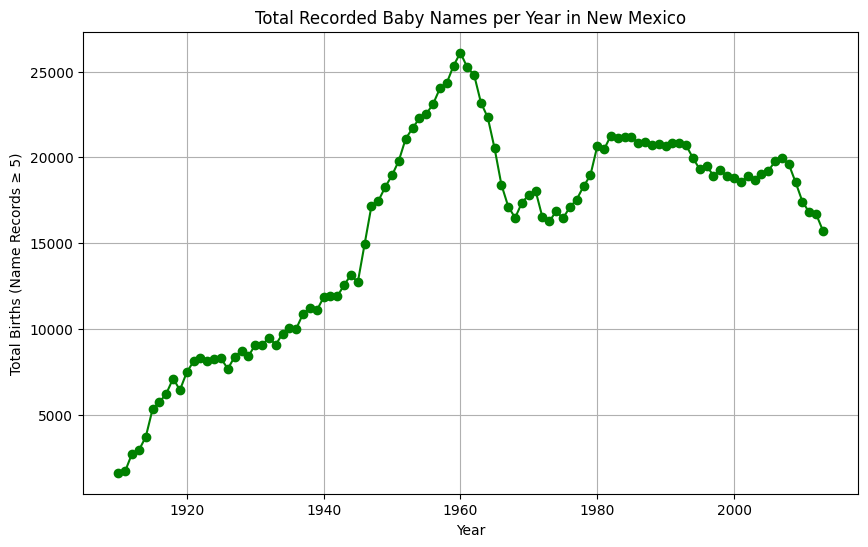

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_11['year'], df_11['total_births'], color='green', marker='o')
plt.title('Total Recorded Baby Names per Year in New Mexico')
plt.xlabel('Year')
plt.ylabel('Total Births (Name Records ≥ 5)')
plt.grid(True)
plt.show()


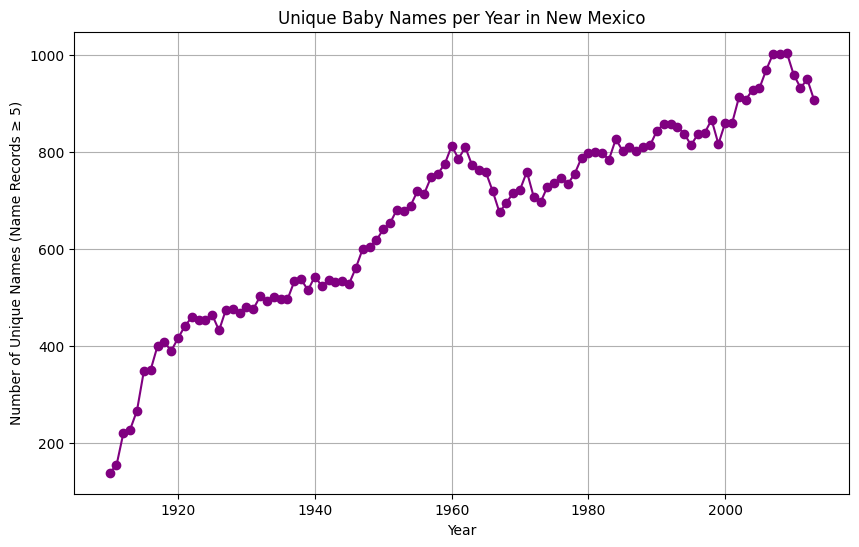

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_10['year'], df_10['unique_names'], color='purple', marker='o')
plt.title('Unique Baby Names per Year in New Mexico')
plt.xlabel('Year')
plt.ylabel('Number of Unique Names (Name Records ≥ 5)')
plt.grid(True)
plt.show()


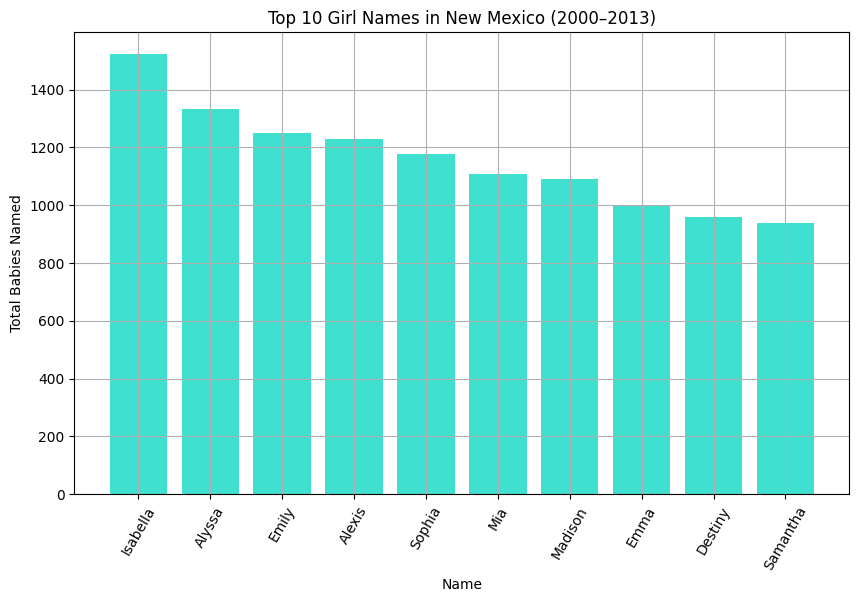

In [ ]:
# Bar chart for top 10 female names 2000–2013
plt.figure(figsize=(10, 6))
plt.bar(df_5['name'], df_5['total'], color='turquoise')
plt.title('Top 10 Girl Names in New Mexico (2000–2013)')
plt.xlabel('Name')
plt.ylabel('Total Babies Named')
plt.xticks(rotation=60)
plt.grid(True)
plt.show()


In [ ]:
query_isabella = """
SELECT year, SUM(number) AS total
FROM `bigquery-public-data.usa_names.usa_1910_2013`
WHERE state = 'NM' AND name = 'Isabella'
GROUP BY year
ORDER BY year;
"""
df_isabella = client.query(query_isabella).to_dataframe()


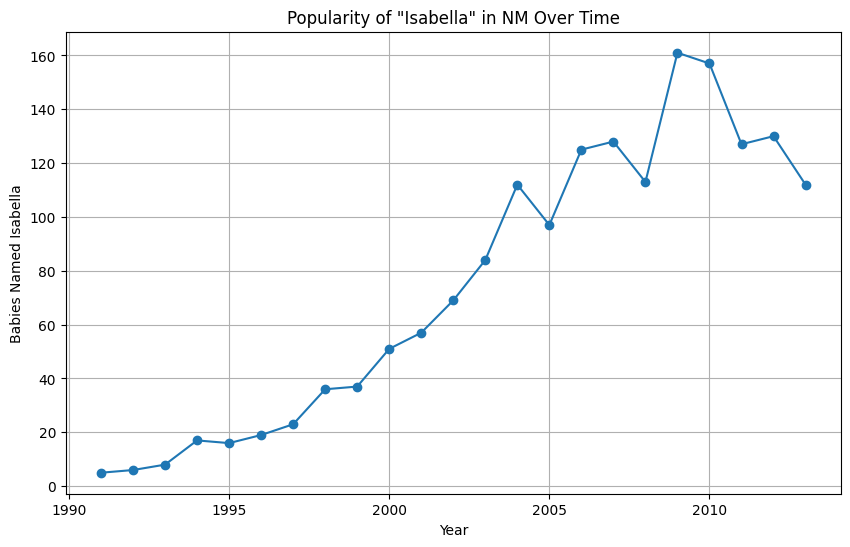

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_isabella['year'], df_isabella['total'], marker='o')
plt.title('Popularity of "Isabella" in NM Over Time')
plt.xlabel('Year')
plt.ylabel('Babies Named Isabella')
plt.grid(True)
plt.show()


In [ ]:
# Get the top 5 female baby names in NM (2000–2013)
query_top5_names = """
SELECT name, SUM(number) AS total
FROM `bigquery-public-data.usa_names.usa_1910_2013`
WHERE state = 'NM' AND gender = 'F' AND year BETWEEN 2000 AND 2013
GROUP BY name
ORDER BY total DESC
LIMIT 5;
"""
df_top5 = client.query(query_top5_names).to_dataframe()
top5_names = df_top5['name'].tolist()
top5_names


['Isabella', 'Alyssa', 'Emily', 'Alexis', 'Sophia']

In [ ]:
# Query 2000-2013 for the top 5 names
query_top5_trend = f"""
SELECT name, year, SUM(number) AS total
FROM `bigquery-public-data.usa_names.usa_1910_2013`
WHERE state = 'NM'
  AND gender = 'F'
  AND year BETWEEN 2000 AND 2013
  AND name IN ({', '.join([f"'{name}'" for name in top5_names])})
GROUP BY name, year
ORDER BY name, year;
"""

df_top5_trend = client.query(query_top5_trend).to_dataframe()
df_top5_trend.head()


,name,year,total
0,Alexis,2000,141
1,Alexis,2001,139
2,Alexis,2002,144
3,Alexis,2003,118
4,Alexis,2004,109


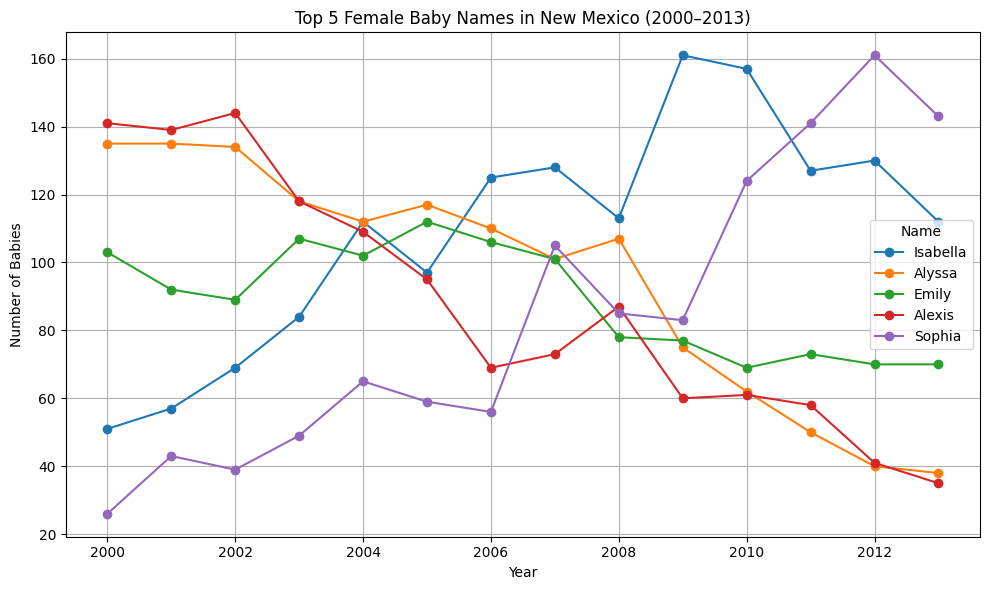

In [ ]:
plt.figure(figsize=(10, 6))

# Plot one line per name
for name in top5_names:
    df_subset = df_top5_trend[df_top5_trend['name'] == name]
    plt.plot(df_subset['year'], df_subset['total'], marker='o', label=name)

plt.title('Top 5 Female Baby Names in New Mexico (2000–2013)')
plt.xlabel('Year')
plt.ylabel('Number of Babies')
plt.legend(title="Name")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Get the top 5 boy names in NM (2000–2013)
query_top5_boys = """
SELECT name, SUM(number) AS total
FROM `bigquery-public-data.usa_names.usa_1910_2013`
WHERE state = 'NM' AND gender = 'M' AND year BETWEEN 2000 AND 2013
GROUP BY name
ORDER BY total DESC
LIMIT 5;
"""
df_top5_boys = client.query(query_top5_boys).to_dataframe()
top5_boy_names = df_top5_boys['name'].tolist()
top5_boy_names


['Jacob', 'Joshua', 'Isaiah', 'Michael', 'Daniel']

In [ ]:
# Query 2000–2013 for the top 5 male names
query_top5_boy_trend = f"""
SELECT name, year, SUM(number) AS total
FROM `bigquery-public-data.usa_names.usa_1910_2013`
WHERE state = 'NM'
  AND gender = 'M'
  AND year BETWEEN 2000 AND 2013
  AND name IN ({', '.join([f"'{name}'" for name in top5_boy_names])})
GROUP BY name, year
ORDER BY name, year;
"""

df_top5_boy_trend = client.query(query_top5_boy_trend).to_dataframe()
df_top5_boy_trend.head()


,name,year,total
0,Daniel,2000,149
1,Daniel,2001,141
2,Daniel,2002,115
3,Daniel,2003,143
4,Daniel,2004,155


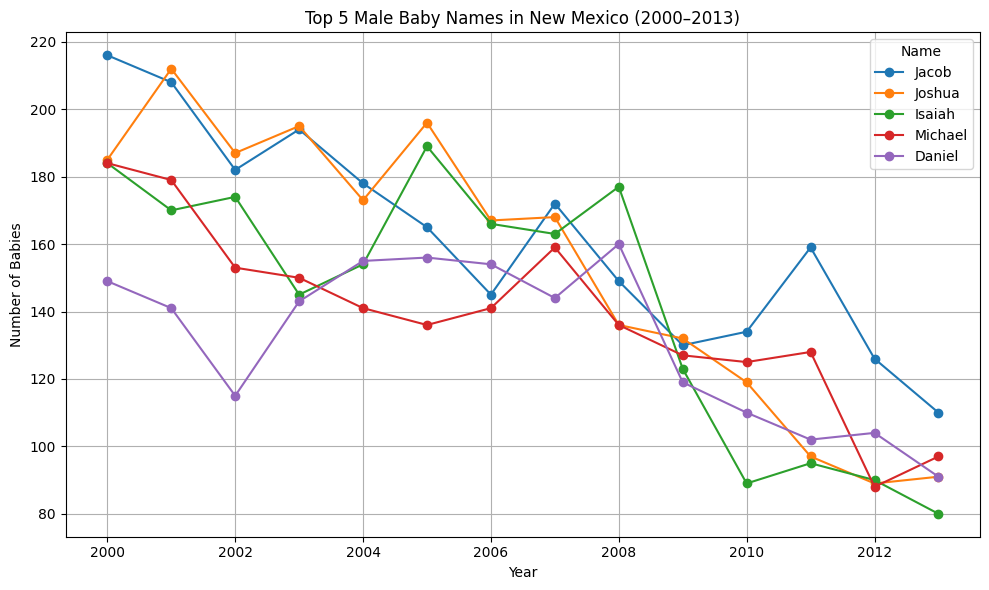

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot one line per name
for name in top5_boy_names:
    df_subset = df_top5_boy_trend[df_top5_boy_trend['name'] == name]
    plt.plot(df_subset['year'], df_subset['total'], marker='o', label=name)

plt.title('Top 5 Male Baby Names in New Mexico (2000–2013)')
plt.xlabel('Year')
plt.ylabel('Number of Babies')
plt.legend(title="Name")
plt.grid(True)
plt.tight_layout()
plt.show()


## EXTRA CREDIT:

#### Use a query that joins two tables.


#### Make a model to see if you can predict something


#### Come up with something else cool to do with your data
